# Mini Projeto do Brazilian E-Commerce Public Dataset by Olist
### Nele irei analisar o o projeto para s

In [14]:
!pip install mercury
import mercury as mr


app = mr.App(title="Slides demo 📝", description="Wouldn't it be amazing to recompute slides during the show?") 

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\wende\\anaconda3\\lib\\site-packages\\MarkupSafe-2.0.1.dist-info\\METADATA'


  Using cached ipython_genutils-0.2.0-py2.py3-none-any.whl.metadata (755 bytes)

mercury.App


  Using cached s3transfer-0.6.2-py3-none-any.whl.metadata (1.8 kB)
  Using cached debugpy-1.8.17-cp39-cp39-win_amd64.whl.metadata (1.5 kB)
  Using cached pyzmq-27.1.0-cp39-cp39-win_amd64.whl.metadata (6.0 kB)
  Using cached tornado-6.5.2-cp39-abi3-win_amd64.whl.metadata (2.9 kB)


# Olá, Seja Bemvindo!
Aqui vamos aprender muitas coisas, sobre o Brasil ecommce

C:\Users\wende\AppData\Local\Temp\ipykernel_7004\3407369177.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colorize = dict(c=X[:,0], cmap=plt.cm.get_cmap('rainbow', 5))


(-0.19733011668254788,
 4.196551067795492,
 0.037244507938991166,
 0.9906432035844845)

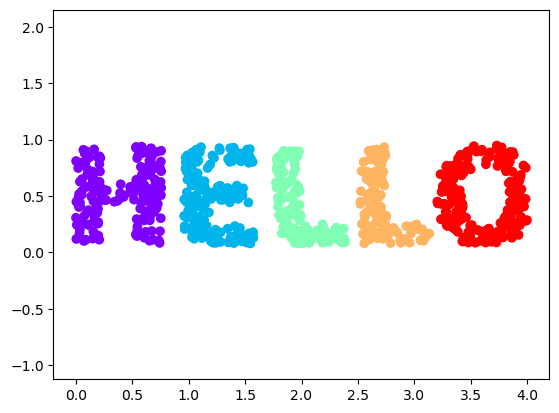

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
## plt.style.use('seaborn-whitegrid')

mr.Markdown("""# Olá, Seja Bemvindo!
Aqui vamos aprender muitas coisas, sobre o Brasil ecommce""")

def make_hello(N=1000, rseed=42):
    # Cria uma imagem com o texto "HELLO" e salva como PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center',
            weight='bold', size=85)
    fig.savefig('hello.png')  # salva como PNG
    plt.close(fig)

    # Abre a imagem e gera pontos aleatórios baseados no texto
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T  # troca pra PNG aqui também
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[N:]
    return X[np.argsort(X[:, 0])]

# Gera os pontos
X = make_hello(1000)
colorize = dict(c=X[:,0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:,0], X[:,1], **colorize)
plt.axis('equal')

In [16]:

# Lendo o CSV
df = pd.read_csv("Notebook/Arquivos/olist_order_payments_dataset.csv")
df_filtrado = df[df['payment_type'] != 'not_defined']


In [17]:
# Total de pagamentos
total_pagamentos = df_filtrado["payment_sequential"].count()

# Agrupamento e cálculos
tabela = df_filtrado.groupby("payment_type").agg({
    "payment_sequential": "count",  
    "payment_value": ["mean", "max", "min"]
})

# Renomear colunas
tabela.columns = [
    "Qtde Pagamentos",
    "Média de Pagamentos",
    "Máximo de Pagamento",
    "Mínimo de Pagamento"
]

# Adicionar coluna de porcentagem
tabela["% do Total"] = (tabela["Qtde Pagamentos"] / total_pagamentos) * 100


In [18]:

tabela_formatada = tabela.style \
    .format({
        "Média de Pagamentos": "${:,.2f}",
        "Máximo de Pagamento": "${:,.2f}",
        "Mínimo de Pagamento": "${:,.2f}",
        "% do Total": "{:.2f}%"
    }) \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('font-size', '18px'), ('font-weight', 'bold'), ('color', '#333')]
    }]) \
    .background_gradient(subset=["Qtde Pagamentos"], cmap="Blues") \
    .background_gradient(subset=["Média de Pagamentos"], cmap="Greens") \
    .background_gradient(subset=["% do Total"], cmap="Oranges")


In [19]:
mr.Markdown("""# 💰 Resumo de Pagamentos por Cartões""")
tabela_formatada


# 💰 Resumo de Pagamentos por Cartões

,Qtde Pagamentos,Média de Pagamentos,Máximo de Pagamento,Mínimo de Pagamento,% do Total
payment_type,,,,,
boleto,19784,$145.03,"$7,274.88",$11.62,19.04%
credit_card,76795,$163.32,"$13,664.08",$0.01,73.92%
debit_card,1529,$142.57,"$4,445.50",$13.38,1.47%
voucher,5775,$65.70,"$3,184.34",$0.00,5.56%


# Grafíco De Pagamentos por Tipo
Nesse grafico podemos analisar que o cartão de credito, está ocupando o o primeiro lugar, assim como o boleto.
Ambos pode parcelar os produtos, e ajudar as pessoas de baixar renda.
Cartão de credito ocupa 73.92% do total por ticket, ao lomgo prazo é bom, mas essas parcelas não consome uma porcentagem da loja? 


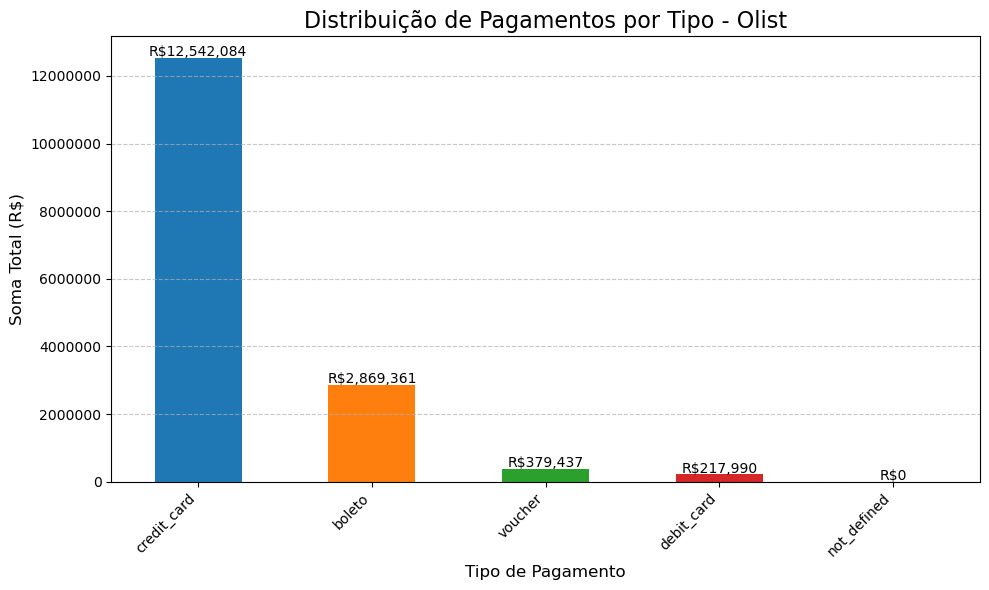

In [20]:
soma_tipo_pagamento = df.groupby("payment_type")["payment_value"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
soma_tipo_pagamento.plot(kind='bar', color=['#1f77b4','#ff7f0e','#2ca02c','#d62728'])

plt.ticklabel_format(style='plain', axis='y')

plt.title('Distribuição de Pagamentos por Tipo - Olist', fontsize=16)
plt.xlabel('Tipo de Pagamento', fontsize=12)
plt.ylabel('Soma Total (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
for i, v in enumerate(soma_tipo_pagamento):
    plt.text(i, v + 50000, f'R${v:,.0f}', ha='center', fontsize=10)
    
mr.Markdown("""# Grafíco De Pagamentos por Tipo
Nesse grafico podemos analisar que o cartão de credito, está ocupando o o primeiro lugar, assim como o boleto.
Ambos pode parcelar os produtos, e ajudar as pessoas de baixar renda.
Cartão de credito ocupa 73.92% do total por ticket, ao lomgo prazo é bom, mas essas parcelas não consome uma porcentagem da loja? 
""")

plt.tight_layout() 
plt.show()



In [26]:
# Carregar os CSVs
order_items = pd.read_csv("Notebook/Arquivos/olist_order_items_dataset.csv")
products = pd.read_csv("Notebook/Arquivos/olist_products_dataset.csv")

# Fazer merge (junção) pela chave product_id
df = order_items.merge(products, on="product_id", how="inner")

# Agrupar por categoria e calcular métricas principais
tabela = df.groupby("product_category_name").agg({
    "price": ["sum", "count"],          # Receita total e quantidade vendida
    "freight_value": "sum"              # Custo total (frete)
})

# Renomear colunas para facilitar
tabela.columns = ["Receita_Vendida", "Quantidade_Vendida", "Custo_Total"]

# Calcular novas métricas
tabela["Lucro_Estimado"] = tabela["Receita_Vendida"] - tabela["Custo_Total"]
tabela["Margem_%"] = (tabela["Lucro_Estimado"] / tabela["Receita_Vendida"]) * 100
tabela["Ticket_Medio"] = tabela["Receita_Vendida"] / tabela["Quantidade_Vendida"]

# Ordenar pelos maiores valores de receita
tabela_ordenada = tabela.sort_values(by="Receita_Vendida", ascending=False).head(10)

# Estilizar a tabela
tabela_estilizada = (
    tabela_ordenada.style
    .format({
        "Receita_Vendida": "${:,.2f}",
        "Lucro_Estimado": "${:,.2f}",
        "Custo_Total": "${:,.2f}",
        "Ticket_Medio": "${:,.2f}",
        "Margem_%": "{:.2f}%"
    })
    .set_table_styles([
        {
            'selector': 'caption',
            'props': [('font-size', '16px'), ('font-weight', 'bold')]
        }
    ])
    .background_gradient(cmap='Reds')
)

# Mostrar o resultado
tabela_estilizada


,Receita_Vendida,Quantidade_Vendida,Custo_Total,Lucro_Estimado,Margem_%,Ticket_Medio
product_category_name,,,,,,
beleza_saude,"$1,258,681.34",9670,"$182,566.73","$1,076,114.61",85.50%,$130.16
relogios_presentes,"$1,205,005.68",5991,"$100,535.93","$1,104,469.75",91.66%,$201.14
cama_mesa_banho,"$1,036,988.68",11115,"$204,693.04","$832,295.64",80.26%,$93.30
esporte_lazer,"$988,048.97",8641,"$168,607.51","$819,441.46",82.94%,$114.34
informatica_acessorios,"$911,954.32",7827,"$147,318.08","$764,636.24",83.85%,$116.51
moveis_decoracao,"$729,762.49",8334,"$172,749.30","$557,013.19",76.33%,$87.56
cool_stuff,"$635,290.85",3796,"$84,039.10","$551,251.75",86.77%,$167.36
utilidades_domesticas,"$632,248.66",6964,"$146,149.11","$486,099.55",76.88%,$90.79
automotivo,"$592,720.11",4235,"$92,664.21","$500,055.90",84.37%,$139.96


# Receita dejesada?? 

### 🧠 Análise de Desempenho por Categoria de Produto

As categorias “beleza_saude” e “relogios_presentes” se destacam como as mais lucrativas, apresentando as maiores receitas e margens de lucro acima de 85%, o que indica uma operação eficiente e com bom posicionamento de preço.
Já “cama_mesa_banho” e “esporte_lazer” possuem alta quantidade de vendas, mas margens menores, sugerindo que o volume compensa a rentabilidade unitária.

Por outro lado, categorias como “moveis_decoracao”, “utilidades_domesticas” e “ferramentas_jardim” apresentam margens abaixo de 80%, o que indica espaço para otimização de custos ou reajuste de preços.
A categoria “automotivo”, apesar de uma margem razoável (84%), tem baixa receita, sugerindo potencial de investimento em marketing ou expansão de catálogo.
### 🔧 Recomendações

Reforçar campanhas entre categorias de alta margem e receita (como beleza_saude e relogios_presentes).

Aumentar em 2% a margem das categorias com rentabilidade abaixo de 80% — como Automotivo, Móveis e Decoração e Ferramentas e Jardim — e acompanhar os resultados mensalmente.

Explorar oportunidades de crescimento em categorias com ticket médio elevado (relogios_presentes e cool_stuff).
    

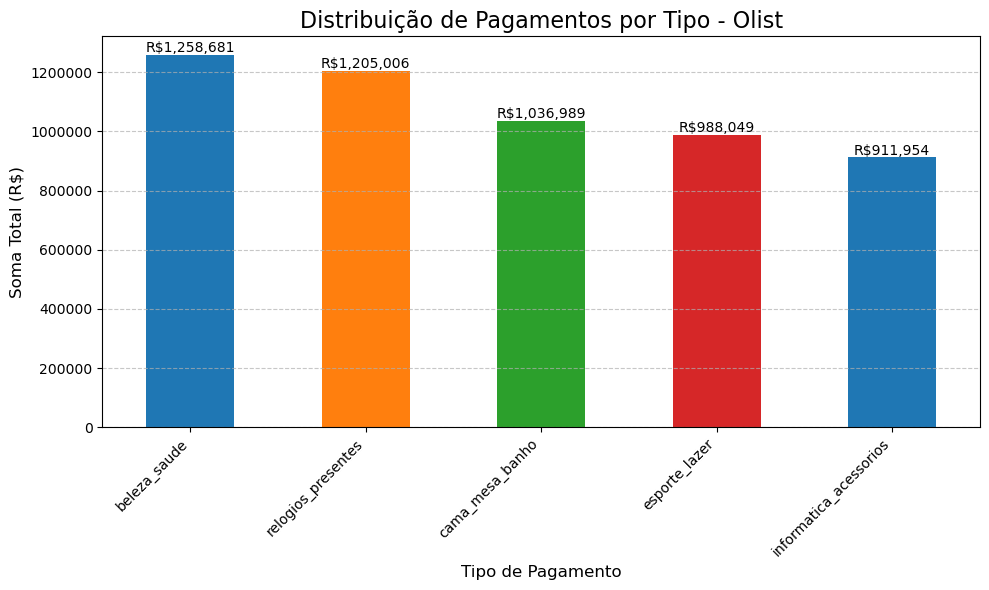

In [11]:
receita_category = df.groupby("product_category_name")["price"].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
receita_category.plot(kind='bar', color=['#1f77b4','#ff7f0e','#2ca02c','#d62728'])

plt.ticklabel_format(style='plain', axis='y')

plt.title('Distribuição de Pagamentos por Tipo - Olist', fontsize=16)
plt.xlabel('Tipo de Pagamento', fontsize=12)
plt.ylabel('Soma Total (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
for i, v in enumerate(receita_category):
    plt.text(i, v + 10000, f'R${v:,.0f}', ha='center', fontsize=10)
    
plt.tight_layout() 
plt.show()


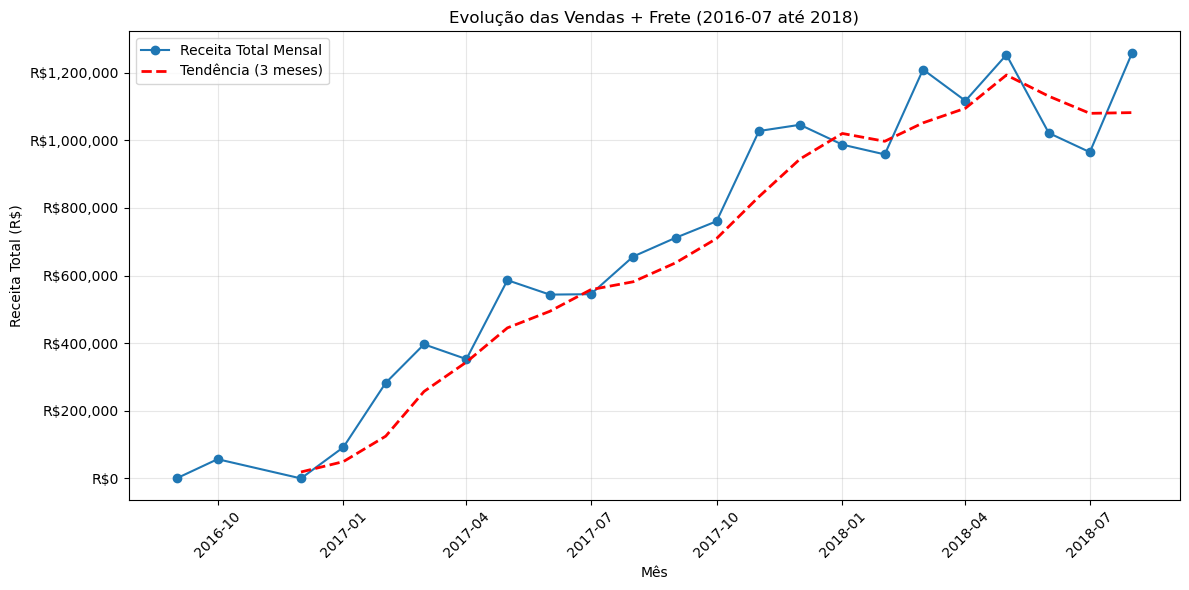

# Vendas estão indo bem?
### Avaliação de vendas
como podemos ver há um crescimento consistente nas receitas totais entre o final de 2016 e o primeiro semestre de 2018.
Isso indica expansão do volume de vendas e/ou aumento de ticket médio.

O pico máximo ocorre entre março e junho de 2018, com valores acima de R$1,2 milhão — possivelmente o auge do período analisado.

Após o pico, a tendência começa a estabilizar levemente, o que pode sinalizar saturação do mercado ou mudanças sazonais (ex: fim de campanhas, estoques ou promoções). 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker



# Converte a coluna de data para datetime
order_items["shipping_limit_date"] = pd.to_datetime(order_items["shipping_limit_date"])

# Cria uma coluna com o mês/ano
order_items["mes"] = order_items["shipping_limit_date"].dt.to_period("M")

# Calcula a receita total (produto + frete)
order_items["receita_total"] = order_items["price"] + order_items["freight_value"]

# Agrupa por mês e soma a receita total
vendas_por_mes = order_items.groupby("mes")["receita_total"].sum().reset_index()
vendas_por_mes["mes"] = vendas_por_mes["mes"].dt.to_timestamp()

# Cria a linha de tendência (média móvel de 3 meses)
vendas_por_mes["tendencia"] = vendas_por_mes["receita_total"].rolling(window=3).mean()

# 🔍 FILTRO: mostra só de 2016-07 até 2018-12
inicio = "2016-07-01"
fim = "2018-08-31"
vendas_filtrado = vendas_por_mes[
    (vendas_por_mes["mes"] >= inicio) & (vendas_por_mes["mes"] <= fim)
]

# 📊 Gráfico
plt.figure(figsize=(12,6))
plt.plot(vendas_filtrado["mes"], vendas_filtrado["receita_total"], marker="o", label="Receita Total Mensal")
plt.plot(vendas_filtrado["mes"], vendas_filtrado["tendencia"], color="red", linestyle="--", linewidth=2, label="Tendência (3 meses)")
plt.title("Evolução das Vendas + Frete (2016-07 até 2018)")
plt.xlabel("Mês")
plt.ylabel("Receita Total (R$)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('R${x:,.0f}'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


mr.Markdown("""# Vendas estão indo bem?
### Avaliação de vendas
como podemos ver há um crescimento consistente nas receitas totais entre o final de 2016 e o primeiro semestre de 2018.
Isso indica expansão do volume de vendas e/ou aumento de ticket médio.

O pico máximo ocorre entre março e junho de 2018, com valores acima de R$1,2 milhão — possivelmente o auge do período analisado.

Após o pico, a tendência começa a estabilizar levemente, o que pode sinalizar saturação do mercado ou mudanças sazonais (ex: fim de campanhas, estoques ou promoções). """)

# 🧠 Conclusão Geral do Projeto

A análise realizada entre 2016 e 2018 demonstrou um crescimento consistente nas vendas e receitas, refletindo a boa performance comercial e a consolidação da empresa no período. A tendência mostra que, mesmo com pequenas oscilações mensais, o negócio manteve um avanço sólido e sustentável.

As categorias de produtos apresentaram comportamentos distintos. Segmentos como automotivo, móveis e decoração e ferramentas e jardim possuem margens abaixo de 80%, indicando oportunidade de otimização. Recomenda-se ajuste gradual das margens (+2% ao mês), acompanhando o impacto nas vendas e na lucratividade.

Em relação aos métodos de pagamento, o cartão de crédito foi o mais utilizado, o que é positivo para o volume de vendas, mas pode gerar custos elevados devido às taxas de processamento e parcelamentos. É importante avaliar o impacto financeiro das taxas e buscar incentivos para pagamentos à vista, visando aumento da margem líquida.

De forma geral, os resultados indicam que a empresa está em um caminho de crescimento saudável, mas há espaço para melhoria nas margens de lucro e gestão dos meios de pagamento. O acompanhamento mensal desses indicadores permitirá tomadas de decisão mais assertivas e sustentáveis.

###### 